# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [117]:
import pandas as pd
%matplotlib inline
import pylab
from scipy.stats import norm

data = pd.read_csv('data/human_body_temperature.csv')



,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73
5,99.2,M,83
6,98.0,M,71
7,98.8,M,78
8,98.4,F,84
9,98.6,F,86


## Questions 1 

To check if the distribution was normal, I plotted a histogram of body temperatures and checked to see if the histogram had a normal shape.

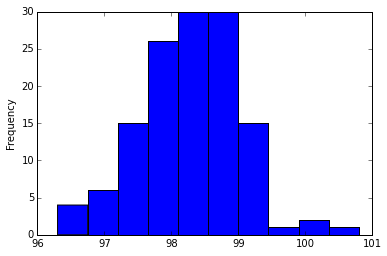

In [108]:
data.temperature.plot(kind='hist')





## Question 2



In [109]:
stats = data.describe()
mean = stats.loc['mean','temperature']
std = stats.loc['std','temperature']
count = stats.loc['count','temperature']
pop = 98.6
std


0.7331831580389454

## Question 3a

I would use a two sample test. I would use a z statistic because although n > 30, I would use a two sample vs one sample because I am checking if the sample mean is different from the population mean in both directions. Using the z-statistic, I came to the conclusion that my null hypothesis of the population mean being equal to 98.6 should be rejected.


In [110]:
# Define a function to find z score. Sample refers to sample mean, pop refers to population mean, std refers to the sample std,
# and n refers to the number of samples. 
import math
import scipy
from scipy import stats 

def zscore(sample,pop,std,n):
    z = (sample - pop)/((std)/(math.sqrt(n)))
    return z

z = zscore(mean,pop,std,count)


#Now, I want to find the probability associated with this z-score so I will use the cdf function. 
p = scipy.special.ndtr(z)


#Since, this is a two tailed test, I would multiply the p-value by two.

p = p*2
p






4.9021570141133797e-08

## Question 3b

In this part, I will try using the t-statistic and notice the changes in the answer I get. The p-value increased when I applied the t statistic. 



In [111]:
#Calculate the t-statistic in the same way I calculated the z-statistic but I will find the probability using a t-distribution
#instead of a normal distribution.

t = zscore(mean,pop,std,count)
df = count - 1

# p value

p_t = stats.t.sf(t,df)
p_t = 1-p_t
p_t*2


2.4106320428707306e-07

## Question 4

Repeat above exercise but with a sample size of 10 which would mean that the appropriate statistic to use would be the t-statistic. 



In [112]:
#Generate a random sample from 
sample = data.sample(n=10)
sstats = sample.describe()
s_mean = sstats.loc['mean','temperature']
s_std = sstats.loc['std','temperature']
s_count = sstats.loc['count','temperature']


In [137]:
z_10 = zscore(s_mean,pop,s_std,s_count)
p_10 = p = scipy.special.ndtr(z_10)
p_10 = p_10*2
p_10

0.0060699086140216458

In [138]:
p_t_10 = 1-(stats.t.sf(z_10,df))
p_t_10 = p_t_10*2
p_t_10

0.0069350627470934345

## Question 5 

At what temperature should we consider someone's temperature to be "abnormal"? To do this problem, I'll start by computing a 99.5% confidence interval to see what temperature falls out of this range. This would be considered abnormal. The range calculated below represents a 99.5% probability of including the true population mean. 





In [116]:
confidence = .995
loc = mean
scale = std/math.sqrt(count)

interval = scipy.stats.norm.interval(confidence,loc,scale)
interval

(98.06872609971316, 98.429735438748395)

## Question 6

Is there a significant difference between males and females in normal temperature? To answer this question, I first need to find the means and standard deviations of males and females. I will set up a two sample hypothesis test:
* Null hypothesis: male_mean - female_mean = 0
* Alternative hypothesis: male_mean - female_mean =/= 0 

After running this test, we see that the p-value is about 0.024 which is less than our threshold of .05. We reject the null hypothesis and conclude that perhaps there is a difference in mean body temperatures of men and women.

In [135]:
male = data[data.gender == 'M']
male = male.temperature

female = data[data.gender == 'F']
female = female.temperature

scipy.stats.ttest_ind(male,female,equal_var=True)





Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

## Conclusion

Based on this exercise, I can conclude a few things about this study. The first would be that the mean body temperature is probably not 98.6 and that there probably is a difference in mean body temperature between men and women. 